# Table of contents
1. [Convert files to json formats](#convert-files-to-json-formats)
2. [Read data](#read-data)
3. [Exploratory data analysis](#exploratory-data-analysis)
        1. [Artists](#artists)
        2. [Sessions](#sessions)
        3. [User](#users)
        4. [Tracks](#tracks)

In [1]:
import numpy as np
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
colors = sns.color_palette('pastel')
sns.set_palette(colors)

In [3]:
PROCESSED_DATA_DIR = "../data/processed"

### Convert files to json formats

In [6]:
def get_list_of_jsons(filepath, idx_start_from=0, num_lines=5000000):
    idx_max = idx_start_from + num_lines
    data = []
    with open(filepath, "r") as f:
        for i, row_data in enumerate(f):
            if i < idx_start_from:
                continue
            if i >= idx_max:
                break
            data.append(json.loads(row_data))
    return data, idx_max

def save_json(list_of_jsons, file_name):
    with open(file_name, "w+") as f:
        json.dump(list_of_jsons, f)

In [7]:
for file_path in os.listdir("../data/v2"):
    file_path = os.path.join("../data/v2", file_path)
    idx_start_from = 0
    chunk_num = 1
    while True:
        data, idx_start_from = get_list_of_jsons(file_path, idx_start_from=idx_start_from)
        if not data:
            break
        new_file_path = f"{file_path[:-5]}_{chunk_num}.json"  # get filepath of json file from jsonl
        save_json(data, new_file_path)
        chunk_num += 1
        print(f"Saved chunk {chunk_num-1} of {file_path}")

Saved chunk 1 of ../data/v2\tracks.jsonl
Saved chunk 1 of ../data/v2\track_storage.jsonl
Saved chunk 1 of ../data/v2\users.jsonl


# Read data

In [4]:
# artists = pd.read_json("../data/v2/artists.json")
sessions = pd.read_json("../data/v2/sessions_1.json")
# sessions2 = pd.read_json("../data/v2/sessions_1.json")
# sessions3 = pd.read_json("../data/v2/sessions_1.json")
#
# sessions = pd.concat([sessions1, sessions2, sessions3], axis=0)
# del sessions1
# del sessions2
# del sessions3
# tracks = pd.read_json("../data/v2/tracks.json")
# track_storage = pd.read_json("../data/v2/track_storage.json")
# users = pd.read_json("../data/v2/users.json")

# Exploratory data analysis

## Artists

### Search for NaNs or wrong values

In [5]:
# convert ids to string and check their length
artists.id.apply(lambda x: len(str(x))).value_counts()

22    1667
Name: id, dtype: int64

In [6]:
artists.id.value_counts().head()

2QsynagSdAqZj3U9HgDzjD    1
1Cs0zKBU1kc0i8ypK3B9ai    1
4Rxn7Im3LGfyRkY2FlHhWi    1
6yhD1KjhLxIETFF7vIRf8B    1
0GM7qgcRCORpGnfcN2tCiB    1
Name: id, dtype: int64

In [7]:
# id of -1 suggest a wrong value
artists.id.replace(-1, np.nan, inplace=True)

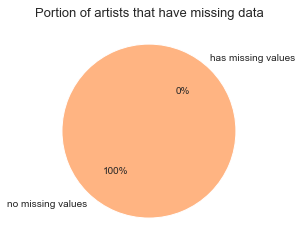

In [8]:
n_records_nan = artists.isna().any(axis=1).sum()
n_records_not_nan = len(artists)-n_records_nan
plt.pie([n_records_nan, n_records_not_nan], labels=['has missing values', 'no missing values'], autopct='%.0f%%', startangle=50);
plt.title("Portion of artists that have missing data", fontsize=13);

In [9]:
artists = artists[~artists.isna().any(axis=1)]

In [10]:
artists.head()

,id,name,genres
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica..."
2,3OKg7YbOIatODzkRIbLJR4,TheFatRat,[speedrun]
3,4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]"
4,56mfhUDKa1vec6rSLZV5Eg,Jawsh 685,[nz pop]


### Onehotencode genres

https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

artists = artists.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(artists.pop('genres')),
                index=artists.index,
                columns=mlb.classes_))

In [12]:
artists.head()

,id,name,a cappella,acid rock,acoustic pop,adult standards,afro dancehall,afrofuturism,afrofuturismo brasileiro,afropop,...,welsh metal,west coast rap,women's music,world,world worship,worship,wrestling,yacht rock,zhongguo feng,zolo
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3OKg7YbOIatODzkRIbLJR4,TheFatRat,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56mfhUDKa1vec6rSLZV5Eg,Jawsh 685,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Save processed artists

In [14]:
if not os.path.isdir(PROCESSED_DATA_DIR):
    os.makedirs(PROCESSED_DATA_DIR)

with open(os.path.join(PROCESSED_DATA_DIR, "artists.csv"), "w+", encoding='utf-8') as f:
    artists.to_csv(f, index=False)

## Sessions

### Ratio of missing data in each column with respect to the whole dataset

In [5]:
sessions.event_type.unique()

array(['play', 'advertisment', 'like', 'skip'], dtype=object)

In [6]:
sessions.isna().sum()/sessions.shape[0]

session_id    0.000000
timestamp     0.000000
user_id       0.000000
track_id      0.136383
event_type    0.000000
dtype: float64

In [7]:
sessions.shape

(5000000, 5)

In [9]:
user108 = sessions[sessions.user_id == 108]

In [13]:
user108.to_excel("../data/test/sessions_user_108.xlsx", index=False)

In [9]:
missing_per_session = sessions.groupby("session_id").apply(lambda x: x.isna().sum()/len(x))  # calculate percentage of missing data in each session

In [10]:
missing_per_session.head()

,session_id,timestamp,user_id,track_id,event_type
session_id,,,,,
124,0.0,0.0,0.0,0.285714,0.0
125,0.0,0.0,0.0,0.133333,0.0
126,0.0,0.0,0.0,0.120000,0.0
127,0.0,0.0,0.0,0.121212,0.0
128,0.0,0.0,0.0,0.000000,0.0


In [11]:
missing_per_session = missing_per_session.drop(columns=["session_id"])

### Portion of missing and non missing data

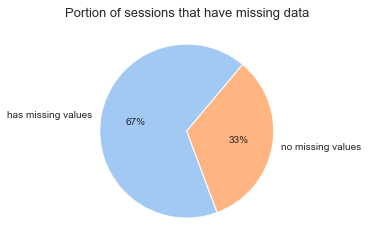

In [12]:
n_records_not_nan = (missing_per_session== 0.0).all(axis=1).sum()
n_records_nan = len(missing_per_session) - n_records_not_nan
plt.pie([n_records_nan, n_records_not_nan], labels=['has missing values', 'no missing values'], autopct='%.0f%%', startangle=50);
plt.title("Portion of sessions that have missing data", fontsize=13);

### Ratio of missing data in each column with respect to each session listened by user

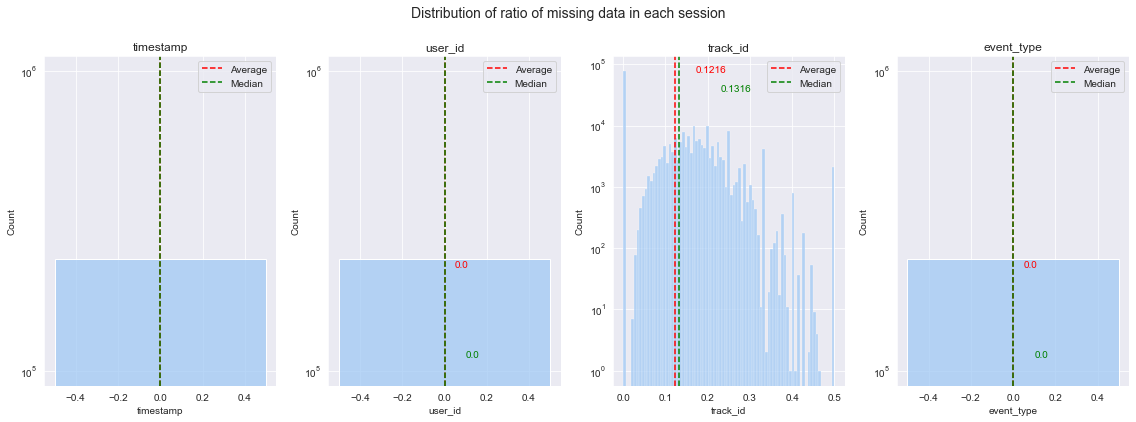

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Distribution of ratio of missing data in each session", fontsize=14)

for i, col_name in enumerate(missing_per_session.columns):
    sns.histplot(data=missing_per_session, x=col_name, ax=ax[i])

    mean=missing_per_session[col_name].mean()
    median=missing_per_session[col_name].median()

    if col_name != 'timestamp':
        ylim = ax[i].get_ylim()  # get the y-axis limits
        y_pos = (ylim[1] - ylim[0]) * 0.9 + ylim[0]  # calculate the y-position of the text

        ax[i].text(mean+0.05, y_pos, f"{round(mean, 4)}", color='red')
        ax[i].text(median+0.1, y_pos*0.5, f"{round(median, 4)}", color='green')

    ax[i].axvline(x=mean, color='red', linestyle='--', linewidth=1.5, label='Average')
    ax[i].axvline(x=median, color='green', linestyle='--', linewidth=1.5, label='Median')

    ax[i].set_title(col_name);ax[i].set_yscale('log');ax[i].legend();

fig.tight_layout(pad=1.5);

### Number of tracks per session

In [14]:
n_tracks_per_session = sessions.groupby("session_id").count().timestamp.value_counts().reset_index()
n_tracks_per_session = n_tracks_per_session.rename(columns={'index': "Number of tracks in session", "timestamp": "Number of sessions"})

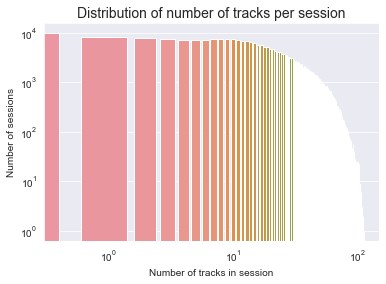

In [15]:
fig = plt.figure(figsize=(6, 4))
sns.barplot(data=n_tracks_per_session, x="Number of tracks in session", y="Number of sessions")
plt.xscale('log')
plt.yscale('log')
plt.title("Distribution of number of tracks per session", fontsize=14);

In [16]:
n_of_sessions_45 = n_tracks_per_session[n_tracks_per_session["Number of tracks in session"]>=45]["Number of sessions"].sum()
n_of_sessions_not_45 = n_tracks_per_session["Number of tracks in session"].sum()/n_of_sessions_45

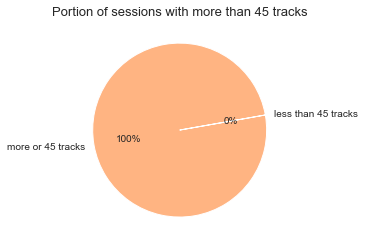

In [17]:
n_records_not_nan = (missing_per_session== 0.0).all(axis=1).sum()
n_records_nan = len(missing_per_session) - n_records_not_nan
plt.pie([n_of_sessions_not_45, n_of_sessions_45], labels=['less than 45 tracks', 'more or 45 tracks'], autopct='%.0f%%', startangle=10);
plt.title("Portion of sessions with more than 45 tracks", fontsize=13);

### Distribution of number of listened tracks in past month

We want that in each month user listened a significant number of tracks to build theirs music preferences.

In [18]:
df = sessions.copy()

In [19]:
df = df[df['event_type'].isin(['play', 'like'])]

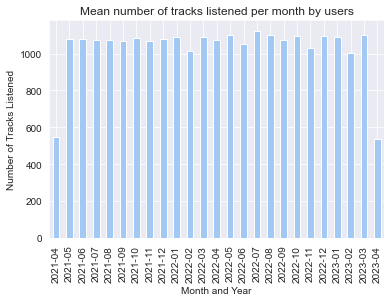

In [20]:
# convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# create a new column with the month and year
df['month_year'] = df['timestamp'].dt.to_period('M')

# group the data by user_id and month_year, and count the number of track_ids
tracks_per_user_month = df.groupby(['user_id', 'month_year'])['track_id'].count()

# collapse the multi-level index to a single level and sum the counts
tracks_per_month = tracks_per_user_month.groupby('month_year').mean()

# plot the distribution of tracks per month
tracks_per_month.plot(kind='bar')

# set the x-axis label
plt.xlabel('Month and Year')

# set the y-axis label
plt.ylabel('Number of Tracks Listened')

# set the title of the plot
plt.title('Mean number of tracks listened per month by users')

# show the plot
plt.show()

### Conclusions

1. In order to utilize sessions, we should have no missing data in every session

## Users

In [15]:
users.head(10)

,user_id,name,city,street,favourite_genres,premium_user
0,101,NaN,NaN,NaN,"[dance pop, latin, hard rock]",False
1,102,NaN,NaN,NaN,"[reggaeton, latin arena pop, modern rock]",False
2,103,NaN,NaN,NaN,"[rap, art rock, rock]",False
3,104,NaN,NaN,NaN,"[mexican pop, contemporary country, psychedeli...",False
4,105,NaN,NaN,NaN,"[rock, adult standards, permanent wave]",False
5,106,NaN,NaN,NaN,"[ranchera, canadian pop, pop]",False
6,107,NaN,NaN,NaN,"[folk rock, dance pop, regional mexican]",False
7,108,NaN,NaN,NaN,"[adult standards, dance pop, latin pop]",False
8,109,NaN,NaN,NaN,"[electropop, latin arena pop, latin]",True
9,110,NaN,NaN,NaN,"[rock, reggaeton, hard rock]",True


Some columns were anonymized, so they can contain missing values. However, other columns are necessary for the analysis.

In [16]:
IMPORTANT_COLS = ['user_id', 'favourite_genres', 'premium_user']

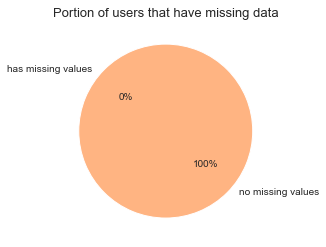

In [17]:
n_records_nan = users[IMPORTANT_COLS].isna().any(axis=1).sum()
n_records_not_nan = len(users) - n_records_nan
plt.pie([n_records_nan, n_records_not_nan], labels=['has missing values', 'no missing values'], autopct='%.0f%%', startangle=140);
plt.title("Portion of users that have missing data", fontsize=13);

## Tracks

In [18]:
tracks.head(10)

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.586,0.000000,0.332,0.7130,88.973
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.947,0.000009,0.321,0.1340,91.783
2,4Pnzw1nLOpDNV6MKI5ueIR,Nancy (With the Laughing Face) - 78rpm Version,55,199000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.295,0.0826,1,-19.569,0.0367,0.984,0.000358,0.156,0.1690,128.600
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,54,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.840,0.000002,0.788,0.5900,126.974
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),53,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.950,0.276000,0.152,0.1000,90.150
5,5RcvlmVx2xtFcp2Ta5pw7X,Someone To Watch Over Me,57,196667,0,5V0MlUE1Bft0mbLlND7FJz,1950-09-11,0.354,0.0851,7,-13.738,0.0345,0.990,0.000004,0.123,0.1970,97.684
6,5DIVWgTeJ2fPIxaY9e7ZKn,I've Got A Crush On You,56,196440,0,5V0MlUE1Bft0mbLlND7FJz,1950-09-11,0.455,0.1060,2,-14.086,0.0422,0.986,0.000000,0.122,0.2580,66.807
7,0x0ffSAP6PkdoDgHOfroof,My Funny Valentine - Remastered,54,150667,0,1Mxqyy3pSjf8kZZL4QVxS0,1954-01-01,0.257,0.1250,11,-14.267,0.0332,0.891,0.000000,0.108,0.2450,84.930
8,0Hsc0sIaxOxXBZbT3ms2oj,In The Wee Small Hours Of The Morning - Remast...,60,180933,0,1Mxqyy3pSjf8kZZL4QVxS0,1955,0.290,0.0874,0,-16.119,0.0346,0.856,0.000957,0.109,0.0734,114.997
9,3aEJMh1cXKEjgh52claxQp,I've Got You Under My Skin - Remastered 1998,68,223760,0,1Mxqyy3pSjf8kZZL4QVxS0,1956-03,0.585,0.2470,1,-12.612,0.0400,0.452,0.000009,0.107,0.5910,127.150


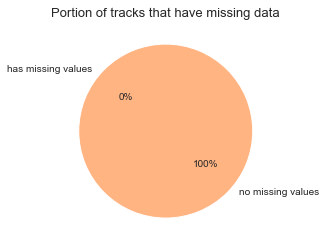

In [19]:
n_records_nan = tracks.isna().any(axis=1).sum()
n_records_not_nan = len(tracks) - n_records_nan
plt.pie([n_records_nan, n_records_not_nan], labels=['has missing values', 'no missing values'], autopct='%.0f%%', startangle=140);
plt.title("Portion of tracks that have missing data", fontsize=13);

In [20]:
tracks_in = sessions[~sessions.isna().any(axis=1)].track_id.isin(tracks.id)

NameError: name 'sessions' is not defined

In [ ]:
tracks_in.sum()/lentracks_in)

In [21]:
tracks.shape, tracks.dtypes

((22412, 17),
 id                   object
 name                 object
 popularity            int64
 duration_ms           int64
 explicit              int64
 id_artist            object
 release_date         object
 danceability        float64
 energy              float64
 key                   int64
 loudness            float64
 speechiness         float64
 acousticness        float64
 instrumentalness    float64
 liveness            float64
 valence             float64
 tempo               float64
 dtype: object)

In [103]:
tracks.isna().sum()/tracks.shape[0]

id                  0.051803
name                0.051133
popularity          0.052829
duration_ms         0.000000
explicit            0.000000
id_artist           0.047876
release_date        0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
dtype: float64